# **ベーカリゲーム 分析**

ベーカリーゲームにてプレーヤーは毎ラウンドで取得できるデータは  
自社の `現金収支` と公開情報として全チームの`販売価格`と`来店者数`のみ  
  
### プレイヤーは 他チームのデータを'販売価格'と'来店者数'以外取得できない

#### 以下のコードによる分析はその制限の元で行う。 <br> よって、他チームの詳細な分析と予測はあまり期待できない。

# 1. ベーカリーゲームの表示ページから毎回ダウンロードする内容

### 1. メッセージ
今回の分析コードでは使用しないためファイル名などはご自由に決めてください  
ご自身で各ラウンドごとにtxtファイルに入力してください    
#### msg.txt サンプル 
```txt
トップチームの剰余金は、23000
```
<br>


### 2. 販売の状況(共通) 
#### ファイル名  20xxBaxx_sales.csv
以下csvサンプル

| | | | | | | | | | | | |
|-|-|-|-|-|-|-|-|-|-|-|-|
|Team:|01|02|03|04|05|06|07|08|09|10||
|販売価格|888|1000|880|880|925|920|875|930|888|700||
|来店者数|119|84|123|123|106|107|125|104|119|244||

<br><br>

### 3. 現金収支
#### ファイル名  20xxBaxx_accounting.csv
以下csvサンプル
  
| | | | |
|-|-|-|-|
|現金収支| | | |
|項目|現金預金|収入|支出|
|繰越金|200000|-|-|
|売上高|-|87500|-|
|材料調達費|-|-|40000|
|製品製造費|-|-|10000|
|一般管理費|-|-|20000|
|支払利息|-|-|0|
|借入金|-|0|-|
|現金収支|17500|-|-|
|次期繰越金|217500|-|-|
| | | | |
|損益計算書| | | |
|売上高|87500| | |
|売上原価|50000| | |
|売上総利益|37500| | |
|一般管理費|20000| | |
|営業利益|17500| | |
|支払利息|0| | |
|経常利益|17500| | |
| | | | |
|貸借対照表| | | |
|資産の部| | | |
|現金貯金|217500| | |
|棚卸資産|50000| | |
|固定資産|250000| | |
|資産合計|517500| | |
| | | | |
|負債・純資産の部| | | |
|流動負債|0| | |
|資本金|500000| | |
|剰余金|17500| | |
|負債純資産合計|517500| | |

<br><br>

### 4. 自社の状況(自チーム)
#### ファイル名  20xxBaxx_teamstatus.csv
以下csvサンプル  
  
| | | | |
|-|-|-|-|
|項目|単価|数量|金額|
|販売価格|875|-|-|
|製造指示|-|100|-|
|材料調達|-|300|-|
|&nbsp;|-|-|-|
|&nbsp;|-|-|-|
|&nbsp;|-|-|-|
|&nbsp;|-|-|-|
|パン完成数|-|100|-|
|来店者数|-|125|-|
|パン販売数|-|100|-|
|売上高|-|-|87500|
|&nbsp;|-|-|-|
|&nbsp;|-|-|-|
|&nbsp;|-|-|-|
|&nbsp;|-|-|-|
|パン品切数|-|25|-|
|パン廃棄数|-|0|-|
|&nbsp;|-|-|-|
|&nbsp;|-|-|-|
|&nbsp;|-|-|-|
|&nbsp;|-|-|-|
|明日の朝の材料在庫数|-|0|-|
|明日の朝の材料納入数|-|300|-|
|明日の朝に完成するパンの数|-|100|-|


# 2. ファイル管理・構成 　
### **分析を行う前に必ず行なってください**
#### csvファイルやテキストを一つのフォルダにラウンドごとにフォルダに分け<br>**カレントディレクトリに保存してください。**  
### フォルダ名は半角数字でラウンド番号を入れて
それぞれ任意のフォルダに格納してください。   
  
### 以下ファイル構成 参照

<pre>
任意のフォルダ名
├── 1
│   ├── 20xxBaxx_accounting.csv
│   ├── 20xxBaxx_sales.csv
│   ├── 20xxBaxx_teamstatus.csv
│   └── msg.txt
├── 2
│   ├── 20xxBaxx_accounting.csv
│   ├── 20xxBaxx_sales.csv
│   ├── 20xxBaxx_teamstatus.csv
│   └── msg.txt
├── 3
│   ├── 20xxBaxx_accounting.csv
│   ├── 20xxBaxx_sales.csv
│   ├── 20xxBaxx_teamstatus.csv
│   └── msg.txt
.
.
.
</pre>

## ↓ データを保存したフォルダとCSVの名前、チーム番号<br>を対応する変数に入力してください
#### ↓ 下側の変数には販売価格の範囲を指定しています。変わっている場合は変更してください
#### 完了したら全て実行です

In [ ]:
rootf = 'ba_t7_game01'  # 対象のルートフォルダ
slcsv = '2024ba1_sales.csv'    # 全チーム公開情報のcsv
accsv = '2024ba1_accounting.csv' # 現金収支のcsv
tmscsv = '2024ba1_teamstatus.csv' # 自チームの販売状況のcsv
team = 9    # 自分のチーム番号を入力


# 以下は基本変更なし
min_price = 500     # 販売価格の最低値(原価)
max_price = 1000    # 販売価格の最大値
min_visitors = 0    # 1チームあたりの来店者数最小値(グラフの範囲を変更する時に変えてください)
max_visitors = 500  # 1チームあたりの来店者数最大値(グラフの範囲を変更する時に変えてください)

# 3. 全て実行
#### このプログラムはご自身のPCでの実行を前提に作成されています。<br>VScode での実行が最もおすすめです。

## Google Colaboratory 
### をお使いの方は 先ほどcsvを保存したフォルダをご自身のアカウントのColab Notebooksに保存した以下のセルのコメントアウトを解除,実行してアクセス権限を承認してください
### その後<br>Colaboratory上部の ランタイム → すべてのセルを実行 <br>をクリック
<br>

In [ ]:
# # Google Driveをマウント
# from google.colab import drive
# drive.mount('/content/drive')

# # 作業フォルダをproenAに移動
# %cd "/content/drive/MyDrive/Colab Notebooks

## PCのJupyter notebook
### ご自身のPCでJupyter notebook を使用される場合は Run → Run All Cells クリック
<br>

## **Visuial Studio code**
### Visuial Studio code の Jupyter をお使いの方は ページ上部の すべてを実行 をクリック

In [17]:
# モジュール import
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from adjustText import adjust_text

### 全体の来店者数の集計から
# ゲーム全体の需要の予測

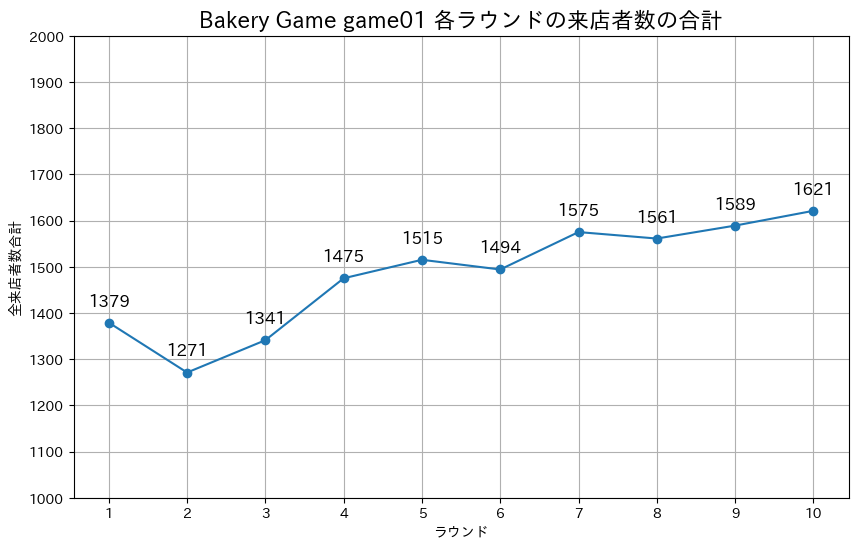

[1379, 1271, 1341, 1475, 1515, 1494, 1575, 1561, 1589, 1621]


In [18]:
def drgv(base, csv):
    r_totals = []  # ラウンドごとの来店者数の合計を格納するリスト
    
    # フォルダ名を整数としてソート
    folders = sorted([f for f in os.listdir(base) if f.isdigit()], key=int)
    
    for folder in folders:
        folder_path = os.path.join(base, folder)
        file_path = os.path.join(folder_path, csv)
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, header=None)
            df.columns = df.iloc[0]
            df = df[1:].reset_index(drop=True)
            df = df.T
            df.columns = df.iloc[0]
            df = df[1:]
            df = df.reset_index(drop=True)
            df.index = range(1, len(df) + 1)
            
            # 来店者数の合計を計算し、リストに追加
            r_tot = df['来店者数'].sum()
            r_totals.append(r_tot)
    
    # 折れ線グラフを描画
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(r_totals) + 1), r_totals, marker='o', linestyle='-')
    
    # 各点の上に来店者数の合計を表示
    for i, total in enumerate(r_totals, start=1):
        plt.text(i, total + 30, str(total), ha='center', va='bottom', fontsize=12)  # 数字を少し上にずらし、フォントサイズを12に設定
    
    plt.xlabel('ラウンド')
    plt.ylabel('全来店者数合計')
    plt.title(f'Bakery Game {rootf} 各ラウンドの来店者数の合計', fontsize=16)  # タイトルのフォントサイズを16に設定
    plt.grid(True)
    plt.ylim(1000, 2000)  # 縦軸の範囲を1000から2000に固定
    
    # 横軸を1ずつに設定
    plt.xticks(range(1, len(r_totals) + 1, 1))
    # 縦軸を100ずつに設定
    plt.yticks(range(1000, 2001, 100))
    
    # plt.savefig(f'Bakery_Game_{rootf}_total_visitors_per_round.png')  # グラフを保存
    plt.show()
    
    print(r_totals)

# 関数を呼び出してグラフを描画
drgv(rootf, slcsv)


### 予測モデルの注意事項
SARIMAモデルは、データの周期性に依存するため、`seasonal_order` の設定がデータに適合していない場合、エラーや不適切な予測結果が生じる可能性があります。

### コードの注意事項
データのスケーリングはモデルのフィッティングに影響を与えるため、予測後にスケーリングを戻す処理を適切に行わなければ、結果が誤解される可能性があります。

### 予測の内容グラフの画像(pngファイル)がcsvを保存した最後のラウンドのフォルダに保存されます。 <br> ファイル名は 'Bakery_game_demand_prediction_{予測回数分}serving.png'

## 予測は 3ラウンド以降 からを推奨します
出力されるグラフは  
<span style="font-size: 20px; color: blue; font-weight: bold;">•ー•</span>  <span style="font-size: 20px;"> がcsvを元に集計したい実際のデータ  </span>  
<span style="font-size: 20px; color: orange; font-weight: bold;">•ー•</span><span style="font-size: 20px;"> がSARIMAモデルに基づく予測</span> 

[1379, 1271, 1341, 1475, 1515, 1494, 1575, 1561, 1589, 1621]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


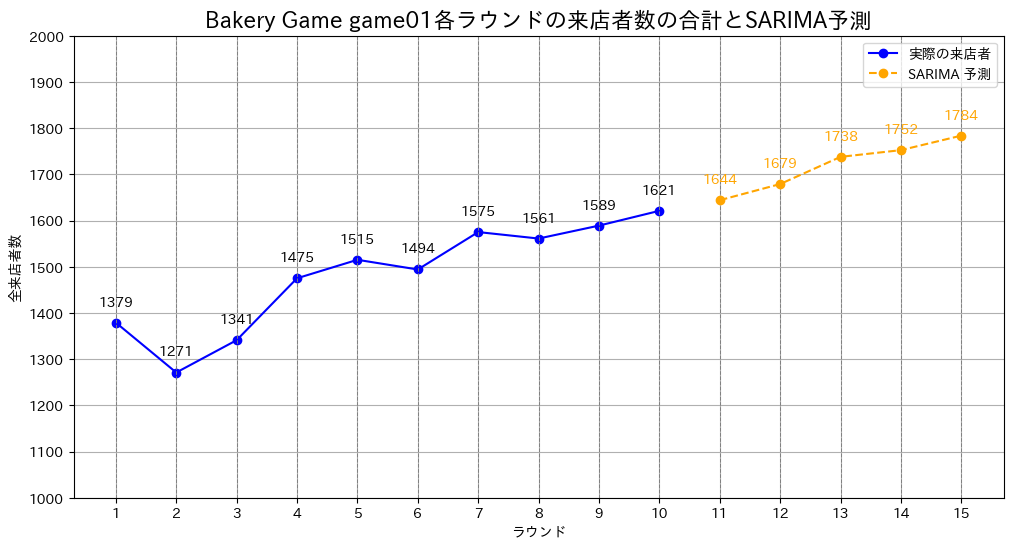

In [25]:
def drgv(forecast_periods=5):  # デフォルトで5ラウンド分を予測
    r_totals = []  # 来店者数の合計を格納するリスト

    # フォルダーの数に対応するループ
    for i in range(1, len(os.listdir(rootf)) + 1):
        folder_path = os.path.join(rootf, str(i))
        file_path = os.path.join(folder_path, slcsv)
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, header=None)
            df.columns = df.iloc[0]
            df = df[1:].reset_index(drop=True)
            df = df.T
            df.columns = df.iloc[0]
            df = df[1:]
            df = df.reset_index(drop=True)
            df.index = range(1, len(df) + 1)
            
            # 来店者数の合計を計算し、リストに追加
            round_total = df['来店者数'].sum()
            r_totals.append(round_total)
            
    print(r_totals)
    
    if len(r_totals) == 0:
        print("データがありません。")
        return

    # データの標準化
    r_totals = np.array(r_totals)
    if r_totals.ndim == 1:
        scaler = StandardScaler()
        r_totals_scaled = scaler.fit_transform(r_totals.reshape(-1, 1)).flatten()
    else:
        print("データの次元が不正です。")
        return

    # SARIMAモデルによる予測
    try:
        model = SARIMAX(r_totals_scaled, order=(1, 1, 1), seasonal_order=(0, 1, 1, 3))
        model_fit = model.fit(disp=0)

        # 次の予測期間の予測を行う
        sarima_forecast_scaled = model_fit.get_forecast(steps=forecast_periods).predicted_mean
        sarima_forecast = scaler.inverse_transform(sarima_forecast_scaled.reshape(-1, 1)).flatten()

        # グラフを描画
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, len(r_totals) + 1), r_totals, marker='o', linestyle='-', color='blue', label='実際の来店者')

        # 横軸に1ずつ数字を振り、縦線を描画
        plt.xticks(range(1, len(r_totals) + forecast_periods + 1, 1))
        for i in range(1, len(r_totals) + forecast_periods + 1):
            plt.axvline(x=i, color='gray', linestyle='--', linewidth=0.7)

        # 予測データの追加
        forecast_x = range(len(r_totals) + 1, len(r_totals) + forecast_periods + 1)
        plt.plot(forecast_x, sarima_forecast, marker='o', linestyle='--', color='orange', label='SARIMA 予測')

        # 点の上に数値を表示
        for i, value in enumerate(r_totals):
            plt.text(i + 1, value+30, f'{value:.0f}', ha='center', va='bottom')
        for i, value in enumerate(sarima_forecast):
            plt.text(forecast_x[i], value+30, f'{value:.0f}', ha='center', va='bottom', color='orange')

        plt.xlabel('ラウンド')
        plt.ylabel('全来店者数')
        plt.title(f'Bakery Game {rootf}各ラウンドの来店者数の合計とSARIMA予測', fontsize=16)
        plt.ylim(1000, 2000)  # 縦軸の範囲を設定

        # 縦軸に100ずつ線を引く
        plt.yticks(range(1000, 2001, 100))

        plt.grid(True)
        plt.legend()

        # 最も数字の大きいフォルダにグラフを保存
        max_folder = max(os.listdir(rootf), key=lambda x: int(x) if x.isdigit() else 0)
        save_path = os.path.join(rootf, max_folder, f'Bakery_game_demand_prediction_{forecast_periods}serving.png')
        plt.savefig(save_path)  # グラフを保存

        # グラフを表示
        plt.show()

    except Exception as e:
        print(f"モデルのフィッティング中にエラーが発生しました: {e}")

# 関数を呼び出してグラフを描画、予測期間を5に設定
drgv(forecast_periods=5)


# 各チームの価格、来店者数と推定利益(ラウンドごと)
### 推定利益 = (販売価格 - $x$円) × 来店者数
※ 固定経費 $x$円 <br>
※ このコードは自社のデータを反映した利益算出はされていません. 

## 出力されるCSVファイル

スクリプトは、各ラウンドのデータを整形し、以下のような内容のCSVファイルを生成します（CSV出力のコードはコメントアウトされていますが、必要に応じて有効化してください）。

csv 例

| Team | 販売価格 | 来店者数 | 推定利益 |
|------|----------|----------|----------|
| 1    | 700      | 120      | 24000    |
| 2    | 850      | 100      | 35000    |
| 3    | 600      | 200      | 20000    |
| ...  | ...      | ...      | ...      |

- **Team**: チーム番号
- **販売価格**: 各チームの販売価格（円）
- **来店者数**: 各チームの来店者数
- **推定利益**: (販売価格 - コスト$x$円) × 来店者数で計算された推定利益（円）

### CSVファイルの保存場所
生成されたCSVファイルは、各ラウンドのフォルダに保存されます（例: `任意のフォルダ名/1/2023Ba19_sales_with_sales.csv`）。

## 出力されるグラフ

スクリプトは、各ラウンドのデータを基に散布図を生成します。

### グラフの内容

- **X軸**: 販売価格（円）
- **Y軸**: 来店者数（人）
- **データ点の色**: 推定利益に応じた色。利益が高いほど暖色<font color="tomato">⚫︎</font> 、低いほど寒色<font color="cornflowerblue">⚫︎</font>  で表示されます。
- **データ点のサイズ**: 推定利益に応じてサイズが変動します。利益が高いほど大きく表示されます。
- **データラベル**: 各データ点にチーム番号が表示されます。
- **非線形回帰（2次関数）**: 販売価格と来店者数の関係を示す2次関数の回帰曲線(<font color="red">- - -</font>)が表示されます。

### 非線形回帰（2次関数）曲線を見れば各ラウンドの適正な価格と販売個数を明らかにできます。 ただしこのコードでは事前の予測はできません

Team:,Team,販売価格,来店者数,推定利益
0,1,950.0,105.0,47250.0
1,2,930.0,112.0,48160.0
2,3,950.0,105.0,47250.0
3,4,1000.0,90.0,45000.0
4,5,900.0,123.0,49200.0
5,6,950.0,105.0,47250.0
6,7,950.0,105.0,47250.0
7,8,880.0,132.0,50160.0
8,9,925.0,113.0,48025.0
9,10,890.0,127.0,49530.0


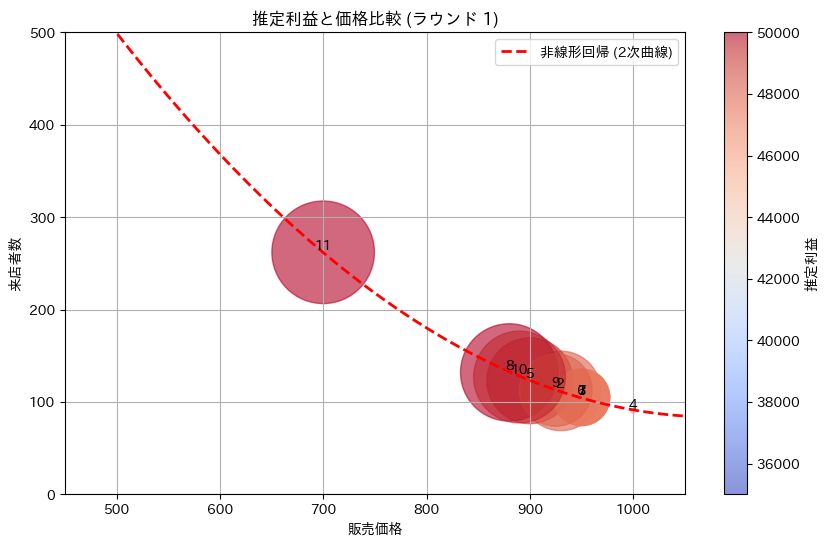

Team:,Team,販売価格,来店者数,推定利益
0,1,965.0,116.0,53940.0
1,2,1000.0,100.0,50000.0
2,3,970.0,114.0,53580.0
3,4,1000.0,106.0,53000.0
4,5,900.0,134.0,53600.0
5,6,820.0,190.0,60800.0
6,7,935.0,128.0,55680.0
7,8,940.0,112.0,49280.0
8,9,1000.0,100.0,50000.0
9,10,950.0,111.0,49950.0


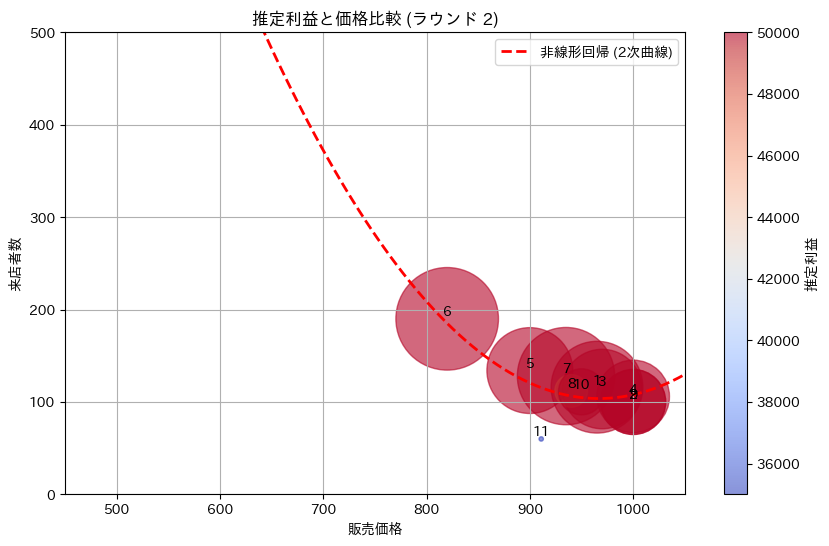

Team:,Team,販売価格,来店者数,推定利益
0,1,900.0,112.0,44800.0
1,2,840.0,147.0,49980.0
2,3,820.0,151.0,48320.0
3,4,950.0,99.0,44550.0
4,5,900.0,103.0,41200.0
5,6,800.0,125.0,37500.0
6,7,880.0,114.0,43320.0
7,8,875.0,124.0,46500.0
8,9,945.0,103.0,45835.0
9,10,820.0,153.0,48960.0


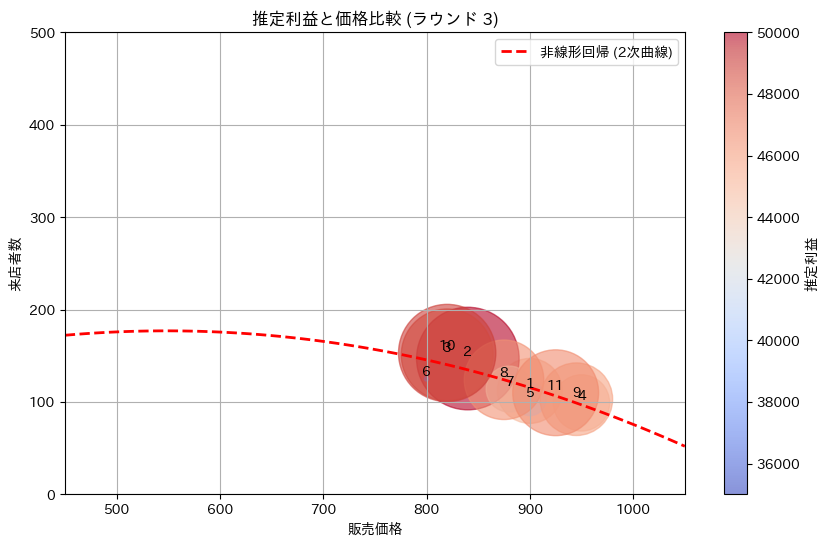

Team:,Team,販売価格,来店者数,推定利益
0,1,870.0,123.0,45510.0
1,2,830.0,142.0,46860.0
2,3,800.0,159.0,47700.0
3,4,1000.0,81.0,40500.0
4,5,850.0,132.0,46200.0
5,6,840.0,137.0,46580.0
6,7,800.0,152.0,45600.0
7,8,815.0,150.0,47250.0
8,9,880.0,119.0,45220.0
9,10,810.0,151.0,46810.0


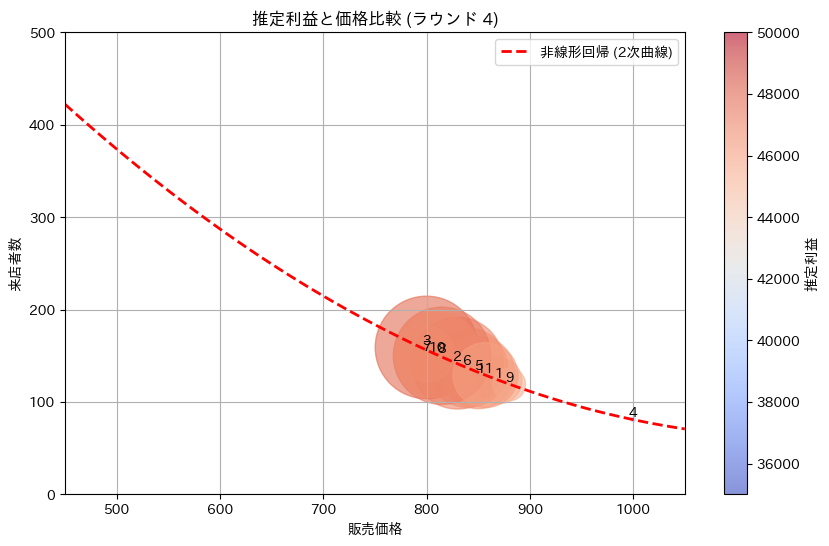

Team:,Team,販売価格,来店者数,推定利益
0,1,820.0,132.0,42240.0
1,2,820.0,132.0,42240.0
2,3,800.0,142.0,42600.0
3,4,700.0,212.0,42400.0
4,5,870.0,109.0,40330.0
5,6,880.0,106.0,40280.0
6,7,800.0,141.0,42300.0
7,8,815.0,134.0,42210.0
8,9,790.0,147.0,42630.0
9,10,810.0,136.0,42160.0


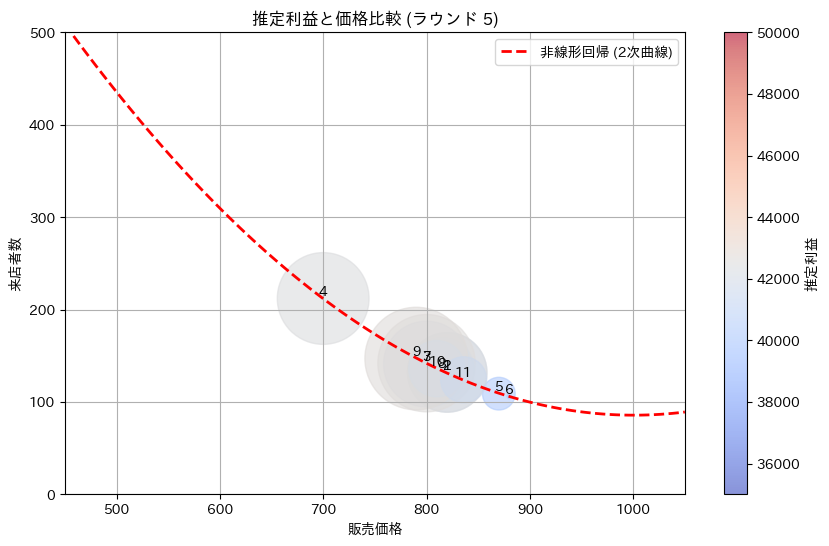

Team:,Team,販売価格,来店者数,推定利益
0,1,830.0,117.0,38610.0
1,2,755.0,155.0,39525.0
2,3,800.0,130.0,39000.0
3,4,700.0,138.0,27600.0
4,5,830.0,117.0,38610.0
5,6,800.0,130.0,39000.0
6,7,800.0,130.0,39000.0
7,8,715.0,182.0,39130.0
8,9,790.0,135.0,39150.0
9,10,800.0,130.0,39000.0


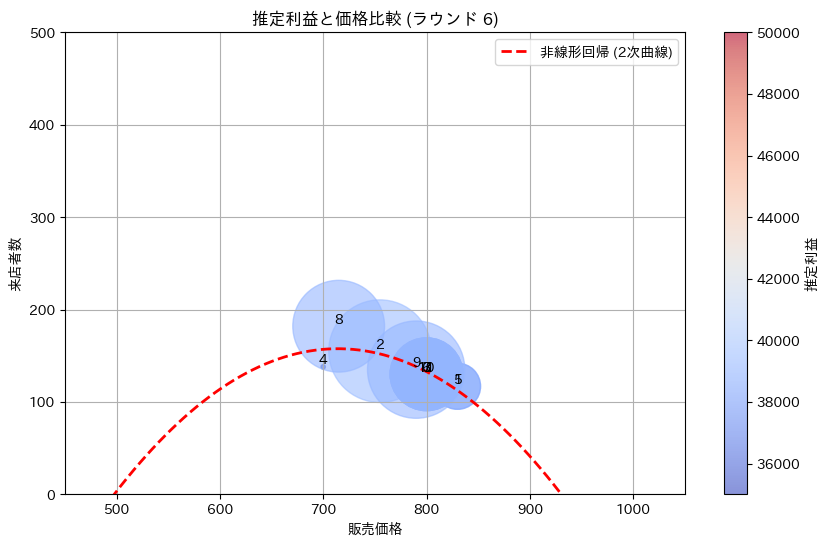

Team:,Team,販売価格,来店者数,推定利益
0,1,830.0,122.0,40260.0
1,2,760.0,159.0,41340.0
2,3,650.0,253.0,37950.0
3,4,800.0,136.0,40800.0
4,5,850.0,113.0,39550.0
5,6,800.0,136.0,40800.0
6,7,792.0,140.0,40880.0
7,8,865.0,108.0,39420.0
8,9,840.0,117.0,39780.0
9,10,790.0,141.0,40890.0


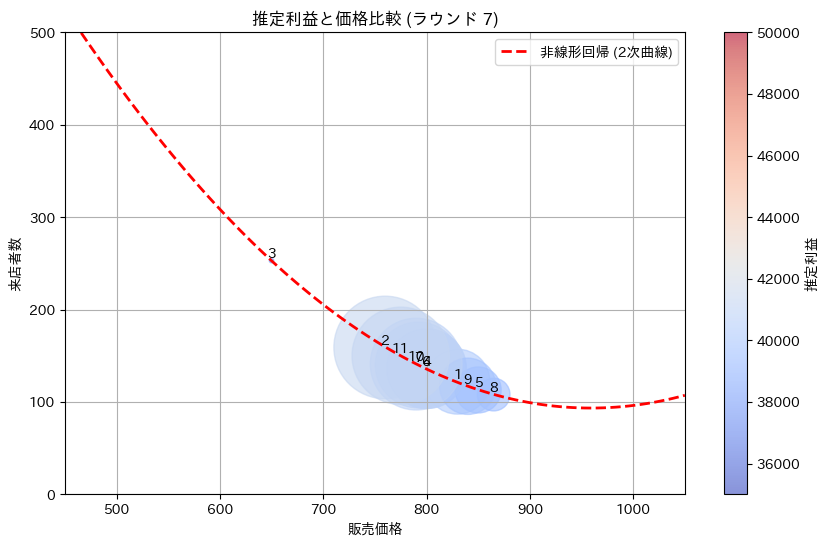

Team:,Team,販売価格,来店者数,推定利益
0,1,880.0,110.0,41800.0
1,2,730.0,189.0,43470.0
2,3,870.0,114.0,42180.0
3,4,800.0,129.0,38700.0
4,5,850.0,116.0,40600.0
5,6,777.0,161.0,44597.0
6,7,783.0,157.0,44431.0
7,8,780.0,155.0,43400.0
8,9,900.0,103.0,41200.0
9,10,750.0,179.0,44750.0


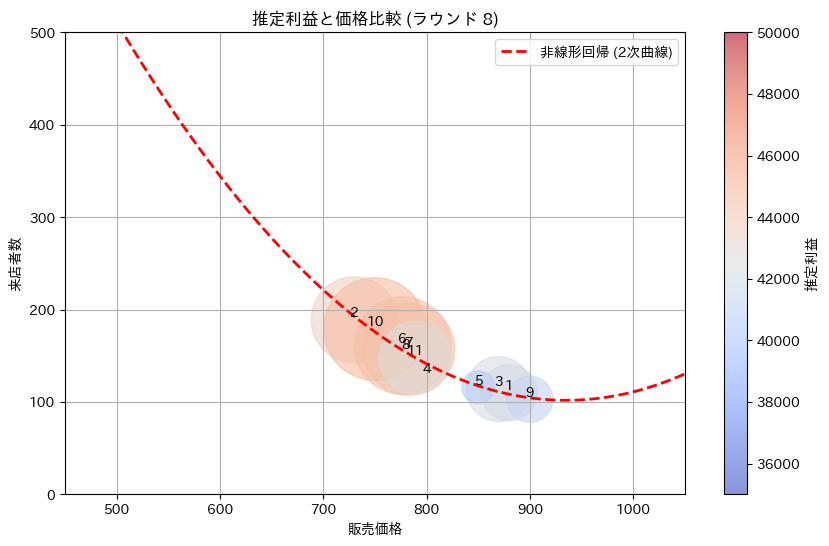

Team:,Team,販売価格,来店者数,推定利益
0,1,900.0,102.0,40800.0
1,2,720.0,204.0,44880.0
2,3,920.0,93.0,39060.0
3,4,800.0,152.0,45600.0
4,5,850.0,127.0,44450.0
5,6,666.0,258.0,42828.0
6,7,800.0,148.0,44400.0
7,8,910.0,101.0,41410.0
8,9,930.0,95.0,40850.0
9,10,760.0,162.0,42120.0


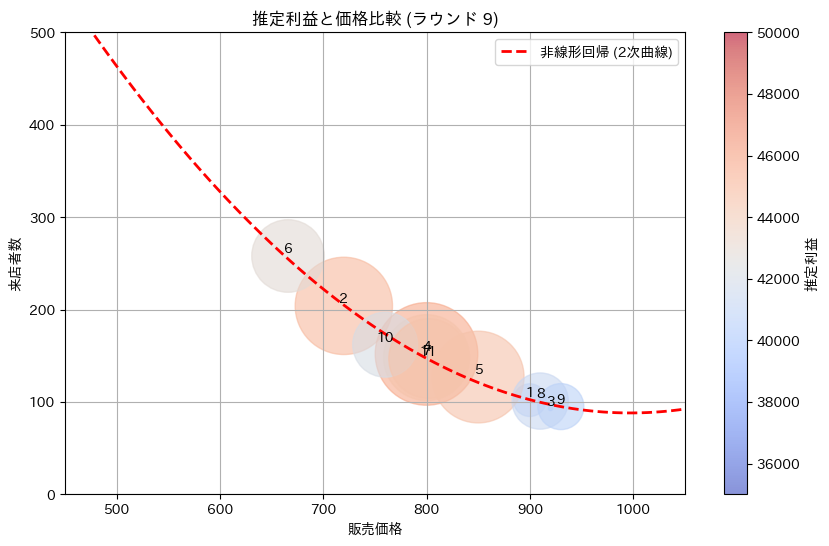

Team:,Team,販売価格,来店者数,推定利益
0,1,875.0,122.0,45750.0
1,2,730.0,209.0,48070.0
2,3,930.0,102.0,43860.0
3,4,800.0,159.0,47700.0
4,5,860.0,126.0,45360.0
5,6,680.0,232.0,41760.0
6,7,855.0,122.0,43310.0
7,8,920.0,105.0,44100.0
8,9,880.0,121.0,45980.0
9,10,770.0,174.0,46980.0


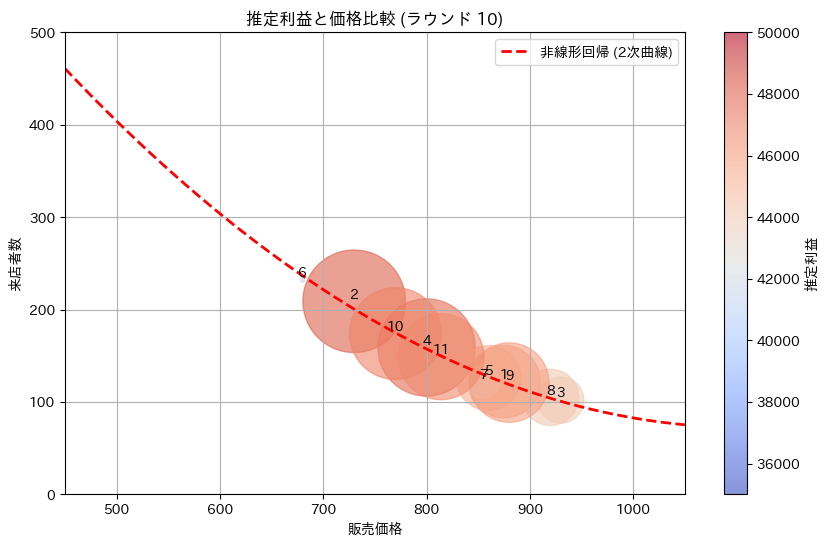

In [21]:
# フォントの設定
#plt.rcParams['font.family'] = 'Arial Unicode MS'  # 代替の日本語フォントを指定


# 縦横軸の最小値と最大値を設定
minGprice = min_price - 50
maxGprice = max_price + 50
minGvisit = min_visitors
maxGvisit = max_visitors - 50
minGprft = 35000
maxGprft = 50000

# フォルダ数をカウントしてnum_roundsに設定
num_rounds = len([name for name in os.listdir(rootf) if os.path.isdir(os.path.join(rootf, name))])


# 1から9のフォルダを処理
for i in range(1, num_rounds+1):
    folder_path = os.path.join(rootf, str(i))
    file_path = os.path.join(folder_path, slcsv)
    
    # ファイルが存在する場合は読み込んで処理
    if os.path.exists(file_path):
        # CSVファイルをDataFrameとして読み込む
        df = pd.read_csv(file_path, header=None)
        
        # データを整形
        df.columns = df.iloc[0]
        df = df[1:].reset_index(drop=True)
        df = df.T
        df.columns = df.iloc[0]
        df = df[1:]
        df = df.reset_index(drop=True)
        df.index = range(1, len(df) + 1)  # インデックスを1から始める
        df['Team'] = df.index  # 新たに 'Team' 列を追加し、1からの連番で値を割り当てる
        
        # データを数値に変換
        df['販売価格'] = pd.to_numeric(df['販売価格'])
        df['来店者数'] = pd.to_numeric(df['来店者数'])
        
        # 推定利益の計算
        df['推定利益'] = (df['販売価格'] - 500) * df['来店者数']  # (販売価格 - コスト500円) × 来店者数
        
        # データの整理
        df = df[['Team', '販売価格', '来店者数', '推定利益']].dropna().reset_index(drop=True)
        
        # CSVファイルとして出力
        # output_file_path = os.path.join(folder_path, "2023Ba19_sales_with_sales.csv")
        # df.to_csv(output_file_path, index=False)
        
        # CSVファイルの表示
        display(df)
        
        # サイズの調整
        df['推定利益順位'] = df['推定利益'].rank(ascending=False).astype(int)
        max_rank = df['推定利益順位'].max()
        min_size = 10
        max_size = 2000 * 3  # サイズを3倍に変更
        sizes = ((max_rank - df['推定利益順位']) / max_rank) * (max_size - min_size) + min_size
        
        # グラフの描画
        plt.figure(figsize=(10, 6))
        plt.scatter(df['販売価格'], df['来店者数'], s=sizes, c=df['推定利益'], cmap='coolwarm', alpha=0.6)
        for idx, row in df.iterrows():
            plt.text(row['販売価格'], row['来店者数'], str(int(row['Team'])), ha='center', va='bottom')
        plt.xlabel('販売価格')
        plt.ylabel('来店者数')
        plt.title(f'推定利益と価格比較 (ラウンド {i})')
        plt.colorbar(label='推定利益')
        plt.grid(True)
        
        # 縦横軸の数値を固定
        plt.xlim(minGprice, maxGprice)
        plt.ylim(min_visitors, max_visitors)
        
        # 推定利益の色の範囲を固定
        plt.clim(minGprft, maxGprft)
        
        # 非線形回帰（2次関数）を追加
        x = df['販売価格']
        y = df['来店者数']
        coefficients = np.polyfit(x, y, 2)  # 2次関数の係数を計算
        polynomial = np.poly1d(coefficients)
        x_fit = np.linspace(minGprice, maxGprice, 100)
        y_fit = polynomial(x_fit)
        plt.plot(x_fit, y_fit, color='red', linestyle='--', linewidth=2, label='非線形回帰 (2次曲線)')
        plt.legend()

        plt.show()


### まとめて1枚で描画

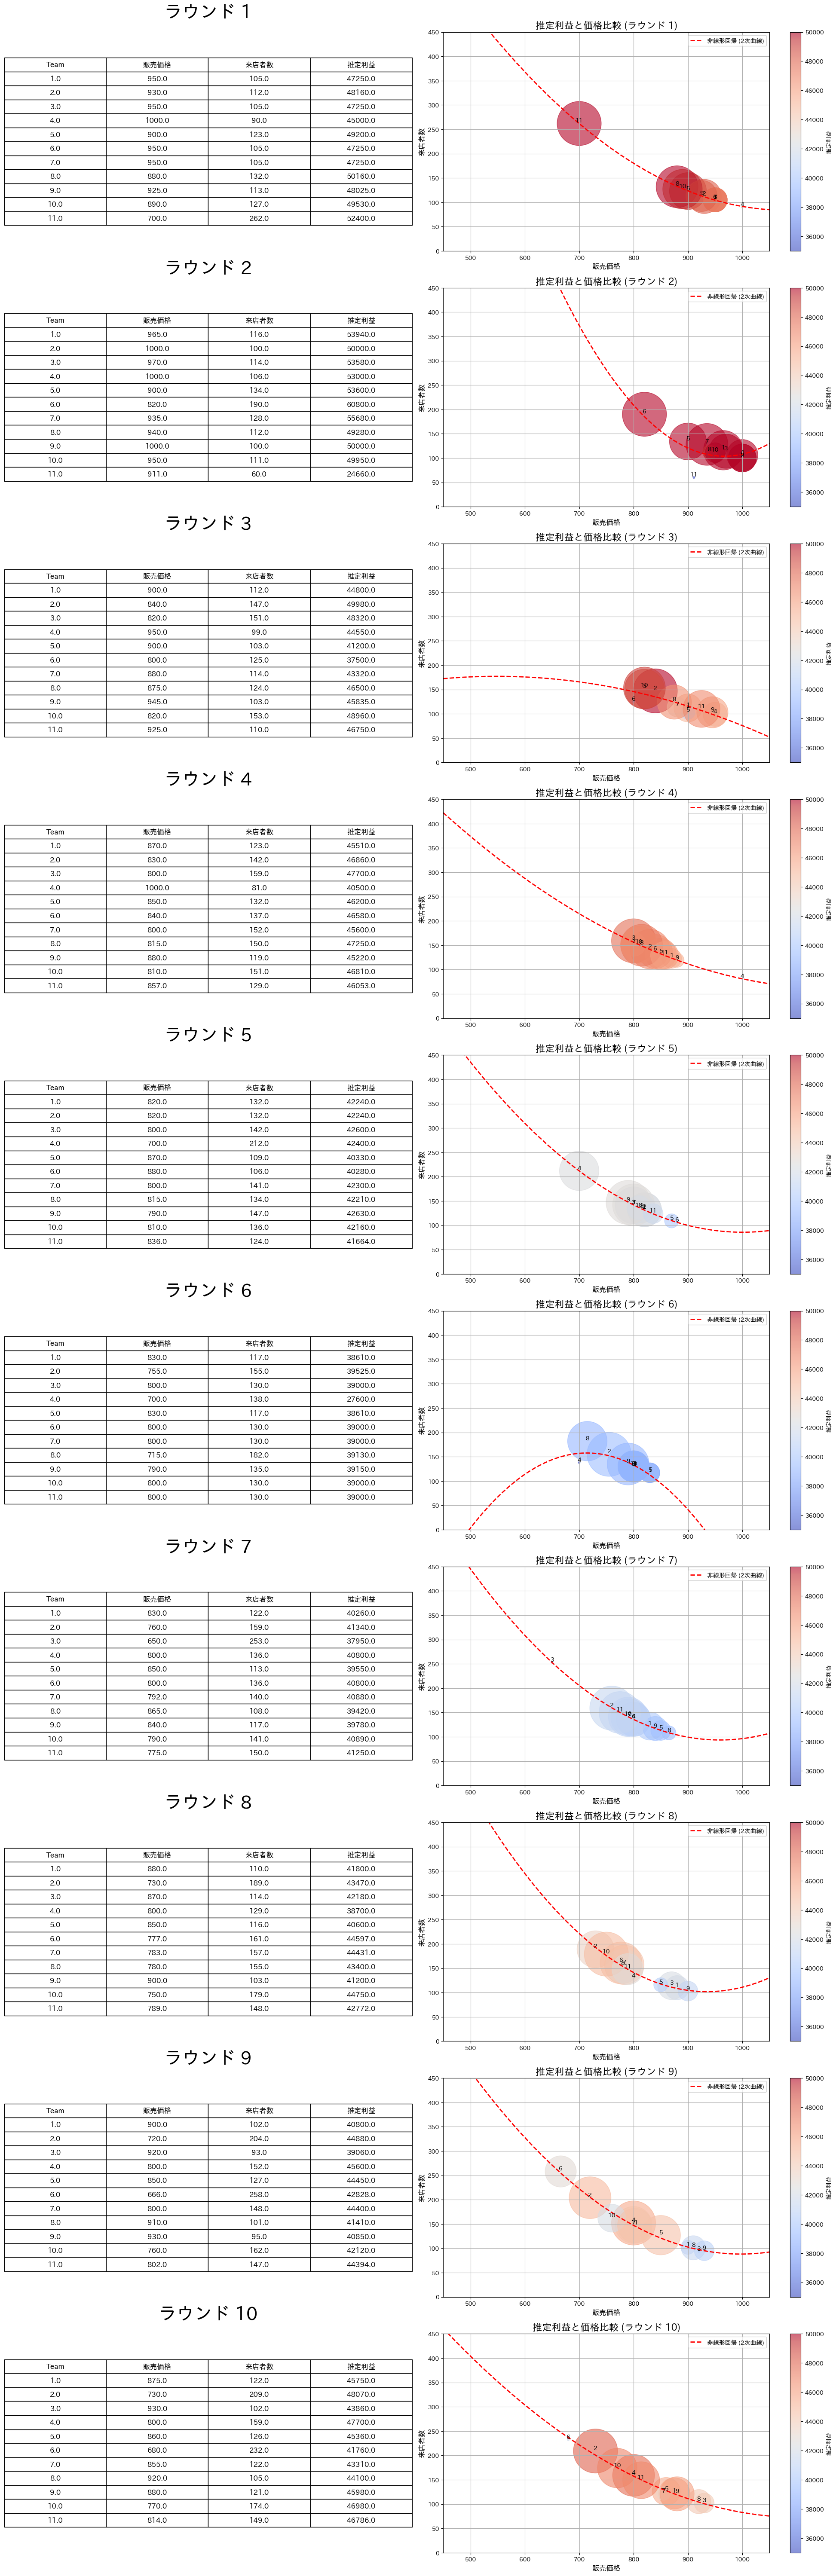

In [22]:

# フォントの設定
#plt.rcParams['font.family'] = 'Arial Unicode MS'  # 代替の日本語フォントを指定

# 縦横軸の最小値と最大値を設定
minGprice = 450
maxGprice = 1050
minGvisit = 0
max_visitors = 450
minGprft = 35000
maxGprft = 50000

# フォルダ数をカウントしてnum_roundsに設定
num_rounds = len([name for name in os.listdir(rootf) if os.path.isdir(os.path.join(rootf, name))])

# グラフの描画設定
fig, axes = plt.subplots(num_rounds, 2, figsize=(20, 6 * num_rounds))  # ラウンド数に応じてサイズを調整

for i in range(1, num_rounds + 1):
    folder_path = os.path.join(rootf, str(i))
    file_path = os.path.join(folder_path, slcsv)
    
    # ファイルが存在する場合は読み込んで処理
    if os.path.exists(file_path):
        # CSVファイルをDataFrameとして読み込む
        df = pd.read_csv(file_path, header=None)
        
        # データを整形
        df.columns = df.iloc[0]
        df = df[1:].reset_index(drop=True)
        df = df.T
        df.columns = df.iloc[0]
        df = df[1:]
        df = df.reset_index(drop=True)
        df.index = range(1, len(df) + 1)  # インデックスを1から始める
        df['Team'] = df.index  # 新たに 'Team' 列を追加し、1からの連番で値を割り当てる
        
        # データを数値に変換
        df['販売価格'] = pd.to_numeric(df['販売価格'])
        df['来店者数'] = pd.to_numeric(df['来店者数'])
        
        # 推定利益の計算
        df['推定利益'] = (df['販売価格'] - 500) * df['来店者数']  # (販売価格 - コスト500円) × 来店者数
        
        # データの整理
        df = df[['Team', '販売価格', '来店者数', '推定利益']].dropna().reset_index(drop=True)
        
        # ラウンド番号の表示（左上）
        axes[i-1, 0].text(0.5, 1.05, f'ラウンド {i}', fontsize=30, ha='center', va='bottom', transform=axes[i-1, 0].transAxes)
        
        # 表の描画（左側）
        axes[i-1, 0].axis('off')
        table = axes[i-1, 0].table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.scale(1, 1.5)
        
        # グラフの描画（右側）
        df['推定利益順位'] = df['推定利益'].rank(ascending=False).astype(int)
        max_rank = df['推定利益順位'].max()
        min_size = 10
        max_size = 2000 * 3  # サイズを3倍に変更
        sizes = ((max_rank - df['推定利益順位']) / max_rank) * (max_size - min_size) + min_size
        
        scatter = axes[i-1, 1].scatter(df['販売価格'], df['来店者数'], s=sizes, c=df['推定利益'], cmap='coolwarm', alpha=0.6)
        for idx, row in df.iterrows():
            axes[i-1, 1].text(row['販売価格'], row['来店者数'], str(int(row['Team'])), ha='center', va='bottom')
        axes[i-1, 1].set_xlabel('販売価格', fontsize=12)
        axes[i-1, 1].set_ylabel('来店者数', fontsize=12)
        axes[i-1, 1].set_title(f'推定利益と価格比較 (ラウンド {i})', fontsize=16)
        axes[i-1, 1].grid(True)
        
        # 縦横軸の数値を固定
        axes[i-1, 1].set_xlim(minGprice, maxGprice)
        axes[i-1, 1].set_ylim(minGvisit, max_visitors)
        
        # カラーバーの範囲を固定
        scatter.set_clim(minGprft, maxGprft)
        plt.colorbar(scatter, ax=axes[i-1, 1], label='推定利益')
        
        # 非線形回帰（2次関数）を追加
        x = df['販売価格']
        y = df['来店者数']
        coefficients = np.polyfit(x, y, 2)  # 2次関数の係数を計算
        polynomial = np.poly1d(coefficients)
        x_fit = np.linspace(minGprice, maxGprice, 100)
        y_fit = polynomial(x_fit)
        axes[i-1, 1].plot(x_fit, y_fit, color='red', linestyle='--', linewidth=2, label='非線形回帰 (2次曲線)')
        axes[i-1, 1].legend()

# グラフ全体を保存
plt.tight_layout()
#plt.savefig('combined_results_with_large_round_numbers.png')
plt.show()


### 全てのcsvを元に
# 自チームの販売状況遷移を可視化

DataFrame:


,ラウンド,販売価格,販売個数,来店者数,売切数,廃棄数,完成数,品切数,売上高,経常利益,剰余金
0,1,925,100,113,13,0,100,13,92500,22500,22500
1,2,1000,100,100,0,0,100,0,100000,30000,52500
2,3,945,103,103,0,17,120,0,97335,17335,69835
3,4,880,119,119,0,11,130,0,104720,19720,89555
4,5,790,147,147,0,23,170,0,116130,11130,100685
5,6,790,135,135,0,45,180,0,106650,-3350,97335
6,7,840,117,117,0,13,130,0,98280,13280,110615
7,8,900,100,103,3,0,100,3,90000,20000,130615
8,9,930,95,95,0,5,100,0,88350,18350,148965
9,10,880,121,121,0,29,150,0,106480,11480,160445


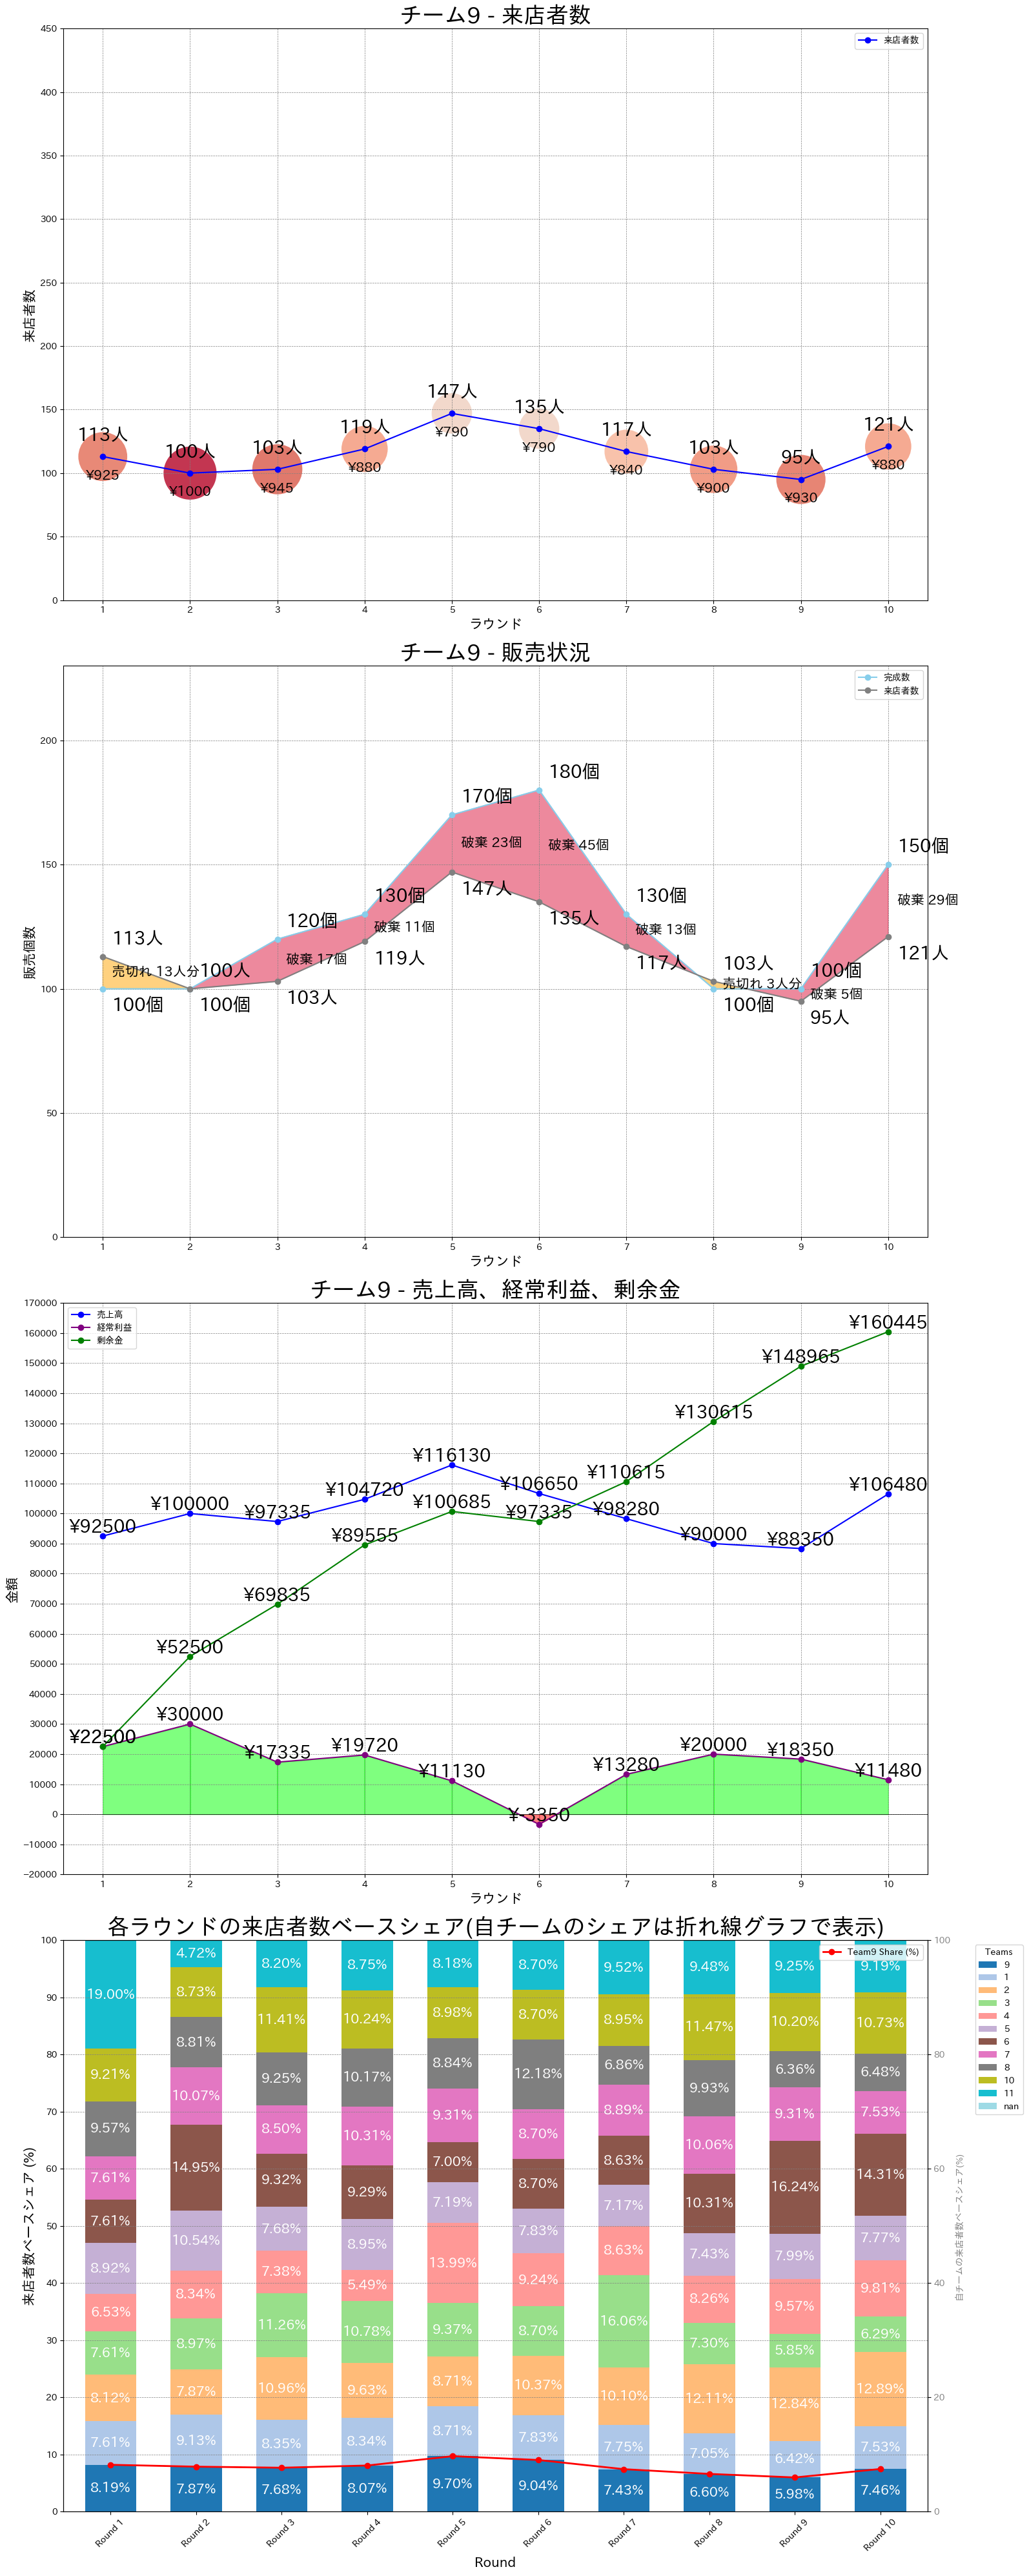

In [23]:
# データのリストを初期化
price = []
units_sold = []
visitors = []
discarded = []
profit = []
sold_out = []
sales = []
completed = []
unsold = []
ordinary_income = []
retained_earnings = []
all_team_visitors = []

# フォルダ数を取得
folder_count = len([name for name in os.listdir(rootf) if name.isdigit()])

# 各フォルダからデータを読み取る
for i in range(1, folder_count + 1):
    teamstatus_path = f'{rootf}/{i}/{tmscsv}'
    accounting_path = f'{rootf}/{i}/{accsv}'
    sales_path = f'{rootf}/{i}/{slcsv}'

    # teamstatusデータを読み取る
    try:
        teamstatus_df = pd.read_csv(teamstatus_path)
        price.append(int(teamstatus_df.loc[teamstatus_df['項目'] == '販売価格', '単価'].values[0]))
        units_sold.append(int(teamstatus_df.loc[teamstatus_df['項目'] == 'パン販売数', '数量'].values[0]))
        visitors.append(int(teamstatus_df.loc[teamstatus_df['項目'] == '来店者数', '数量'].values[0]))
        discarded.append(int(teamstatus_df.loc[teamstatus_df['項目'] == 'パン廃棄数', '数量'].values[0]))
        completed.append(int(teamstatus_df.loc[teamstatus_df['項目'] == 'パン完成数', '数量'].values[0]))
        unsold.append(int(teamstatus_df.loc[teamstatus_df['項目'] == 'パン品切数', '数量'].values[0]))
        
        # 売切数を計算
        if visitors[-1] > units_sold[-1]:
            sold_out.append(visitors[-1] - units_sold[-1])
        else:
            sold_out.append(0)
    except Exception as e:
        print(f"teamstatusデータの読み取りエラー: {teamstatus_path}")
        print(f"エラー内容: {str(e)}")
        price.append(0)
        units_sold.append(0)
        visitors.append(0)
        discarded.append(0)
        completed.append(0)
        unsold.append(0)
        sold_out.append(0)

    # accountingデータを読み取る
    try:
        accounting_df = pd.read_csv(accounting_path)
        sales_row = accounting_df[accounting_df.iloc[:, 0] == '売上高']
        if not sales_row.empty:
            sales_value = sales_row.iloc[0, 2]  # 3列目のデータを取得
            if sales_value == '-' or pd.isna(sales_value):
                sales_value = 0
            else:
                sales_value = int(sales_value)
            sales.append(sales_value)
        else:
            print(f"売上高の行が見つかりません: {accounting_path}")
            sales.append(0)

        ordinary_income_row = accounting_df[accounting_df.iloc[:, 0] == '経常利益']
        if not ordinary_income_row.empty:
            ordinary_income_value = ordinary_income_row.iloc[0, 1]
            if ordinary_income_value == '-' or pd.isna(ordinary_income_value):
                ordinary_income_value = 0
            else:
                ordinary_income_value = int(ordinary_income_value)
            ordinary_income.append(ordinary_income_value)
        else:
            print(f"経常利益の行が見つかりません: {accounting_path}")
            ordinary_income.append(0)

        retained_earnings_row = accounting_df[accounting_df.iloc[:, 0] == '剰余金']
        if not retained_earnings_row.empty:
            retained_earnings_value = retained_earnings_row.iloc[0, 1]
            if retained_earnings_value == '-' or pd.isna(retained_earnings_value):
                retained_earnings_value = 0
            else:
                retained_earnings_value = int(retained_earnings_value)
            retained_earnings.append(retained_earnings_value)
        else:
            print(f"剰余金の行が見つかりません: {accounting_path}")
            retained_earnings.append(0)
    except Exception as e:
        print(f"accountingデータの読み取りエラー: {accounting_path}")
        print(f"エラー内容: {str(e)}")
        sales.append(0)
        ordinary_income.append(0)
        retained_earnings.append(0)

    # salesデータを読み取る
    try:
        sales_df = pd.read_csv(sales_path)
        all_team_visitors.append(sales_df.iloc[1, 1:].astype(float).sum())
    except Exception as e:
        print(f"salesデータの読み取りエラー: {sales_path}")
        print(f"エラー内容: {str(e)}")
        all_team_visitors.append(0)

# 表示用のDataFrameを作成
df_display = pd.DataFrame({
    'ラウンド': range(1, folder_count + 1),
    '販売価格': price,
    '販売個数': units_sold,
    '来店者数': visitors,
    '売切数': sold_out,
    '廃棄数': discarded,
    '完成数': completed,
    '品切数': unsold,
    '売上高': sales,
    '経常利益': ordinary_income,
    '剰余金': retained_earnings
})

# DataFrameを表示
print("DataFrame:")
display(df_display)

# プロットの設定
fig, axs = plt.subplots(4, 1, figsize=(16, 40))

# カラーマップの設定
color_map = plt.cm.coolwarm
norm = plt.Normalize(500, 1000)
colors = [color_map(norm(p)) for p in price]


# 1. 上部のグラフ（来店者数）をプロット
axs[0].plot(df_display['ラウンド'], visitors, color='blue', marker='o', label='来店者数')
for i in range(len(visitors)):
    color = tuple(colors[i][:3] + (0.8,))  # 色の透明度を0.8に設定
    axs[0].scatter(df_display['ラウンド'][i], visitors[i], s=(price[i]-500) * 7, color=color, edgecolors='none')
    # 点の上に来店者数を表示
    axs[0].text(df_display['ラウンド'][i], visitors[i] + 10, f"{visitors[i]}人", fontsize=20, ha='center', va='bottom')
    
    # 点の下に価格を表示
    axs[0].text(df_display['ラウンド'][i], visitors[i] - 10, f"¥{price[i]}", fontsize=15, ha='center', va='top')


axs[0].set_xlabel('ラウンド',fontsize=15)
axs[0].set_ylabel('来店者数',fontsize=15)
axs[0].set_ylim(0, 450)
axs[0].set_yticks(np.arange(0, 451, 50))
axs[0].set_xticks(range(1, folder_count + 1))  # folder_count に基づいて x 軸の目盛りを設定
axs[0].set_title(f'チーム{team} - 来店者数',fontsize=25)
axs[0].grid(which='both', linestyle='--', linewidth=0.5, color='gray')
axs[0].legend()



# 2. 販売状況のグラフ (テキストの重なりを調整)
axs[1].plot(df_display['ラウンド'], completed, color='skyblue', marker='o', label='完成数')
axs[1].plot(df_display['ラウンド'], visitors, color='gray', marker='o', label='来店者数')
axs[1].fill_between(df_display['ラウンド'], completed, visitors, where=(np.array(completed) > np.array(visitors)), 
                    color='crimson', alpha=0.5, interpolate=True)
axs[1].fill_between(df_display['ラウンド'], completed, visitors, where=(np.array(completed) < np.array(visitors)), 
                    color='orange', alpha=0.5, interpolate=True)

for i in range(len(completed)):
    if visitors[i] >= completed[i]:
        # 来店者数のテキスト
        axs[1].annotate(f'{visitors[i]}人', (i+1, visitors[i]), xytext=(10, 10), 
                        textcoords='offset points', ha='left', va='bottom', fontsize=20)
        
        # 完成数のテキスト
        axs[1].annotate(f'{completed[i]}個', (i+1, completed[i]), xytext=(10, -10), 
                        textcoords='offset points', ha='left', va='top', fontsize=20)
    
    elif visitors[i] < completed[i]:
        # 来店者数のテキスト
        axs[1].annotate(f'{completed[i]}個', (i+1, completed[i]), xytext=(10, 10), 
                        textcoords='offset points', ha='left', va='bottom', fontsize=20)
        
        # 完成数のテキスト
        axs[1].annotate(f'{visitors[i]}人', (i+1, visitors[i]), xytext=(10, -10), 
                        textcoords='offset points', ha='left', va='top', fontsize=20)

    # 破棄や売切れのテキスト
    if completed[i] > visitors[i]:
        mid_y = (completed[i] + visitors[i]) / 2
        axs[1].annotate(f'破棄 {discarded[i]}個', (i+1, mid_y), xytext=(10, 0),
                        textcoords='offset points', ha='left', va='center', fontsize=15)
    elif completed[i] < visitors[i]:
        mid_y = (completed[i] + visitors[i]) / 2
        axs[1].annotate(f'売切れ {unsold[i]}人分', (i+1, mid_y), xytext=(10, 0),
                        textcoords='offset points', ha='left', va='center', fontsize=15)

axs[1].set_xlabel('ラウンド',fontsize=15)
axs[1].set_ylabel('販売個数',fontsize=15)
axs[1].set_ylim(0, max(max(completed), max(visitors)) + 50)
axs[1].set_xticks(range(1, folder_count + 1))
axs[1].set_yticks(np.arange(0, max(max(completed), max(visitors)) + 50, 50))
axs[1].set_title(f'チーム{team} - 販売状況',fontsize=25)
axs[1].grid(which='both', linestyle='--', linewidth=0.5, color='gray')
axs[1].legend()



# 3. 売上高、経常利益、剰余金のグラフ (全ての点で色はデフォルトで数値を記述)
max_val = max(max(sales), max(ordinary_income), max(retained_earnings))
min_val = min(min(sales), min(ordinary_income), min(retained_earnings))

# y軸の範囲を設定
y_min = (min_val // 10000) * 10000 - 10000
y_max = (max_val // 10000 + 1) * 10000

axs[2].plot(df_display['ラウンド'], sales, color='blue', marker='o', label='売上高')
axs[2].plot(df_display['ラウンド'], ordinary_income, color='purple', marker='o', label='経常利益')
axs[2].plot(df_display['ラウンド'], retained_earnings, color='green', marker='o', label='剰余金')

# 経常利益の塗りつぶし
for i in range(len(df_display['ラウンド']) - 1):
    x_values = [df_display['ラウンド'][i], df_display['ラウンド'][i+1]]
    y_values = [ordinary_income[i], ordinary_income[i+1]]
    
    # 塗りつぶしが必要な部分を検出
    if y_values[0] > 0 and y_values[1] > 0:
        axs[2].fill_between(x_values, y_values, color='lime', alpha=0.5)
    elif y_values[0] < 0 and y_values[1] < 0:
        axs[2].fill_between(x_values, y_values, color='red', alpha=0.5)
    else:
        # 0を跨ぐ場合の処理
        # 1つ目の点が0以上で、次の点が0未満
        if y_values[0] > 0 and y_values[1] < 0:
            x_cross = x_values[0] + (0 - y_values[0]) * (x_values[1] - x_values[0]) / (y_values[1] - y_values[0])
            axs[2].fill_between([x_values[0], x_cross], [y_values[0], 0], color='lime', alpha=0.5)
            axs[2].fill_between([x_cross, x_values[1]], [0, y_values[1]], color='red', alpha=0.5)
        # 1つ目の点が0未満で、次の点が0以上
        elif y_values[0] < 0 and y_values[1] > 0:
            x_cross = x_values[0] + (0 - y_values[0]) * (x_values[1] - x_values[0]) / (y_values[1] - y_values[0])
            axs[2].fill_between([x_values[0], x_cross], [y_values[0], 0], color='red', alpha=0.5)
            axs[2].fill_between([x_cross, x_values[1]], [0, y_values[1]], color='lime', alpha=0.5)

# 数値ラベルの追加
for i in range(len(sales)):
    axs[2].text(i + 1, sales[i], f'¥{sales[i]}', ha='center', va='bottom', fontsize=20)
    axs[2].text(i + 1, ordinary_income[i], f'¥{ordinary_income[i]}', ha='center', va='bottom', fontsize=20)
    axs[2].text(i + 1, retained_earnings[i], f'¥{retained_earnings[i]}', ha='center', va='bottom', fontsize=20)

axs[2].set_xlabel('ラウンド', fontsize=15)
axs[2].set_ylabel('金額', fontsize=15)
axs[2].set_ylim(y_min, y_max)  # Ensure y-axis starts from y_min and ends at y_max
axs[2].set_xticks(range(1, folder_count + 1))
axs[2].set_yticks(np.arange(y_min, y_max + 10000, 10000))  # Set ticks every 10000
axs[2].set_title(f'チーム{team} - 売上高、経常利益、剰余金', fontsize=25)
axs[2].grid(which='both', linestyle='--', linewidth=0.5, color='gray')
axs[2].axhline(y=0, color='black', linewidth=0.5)  # Add a horizontal line at y=0
axs[2].legend()



# 4. 各ラウンドの来店者数ベースシェアグラフ
all_shares = []
team_shares = []
round_labels = []

# ラウンドごとのシェアデータを計算
for i in range(1, folder_count + 1):
    sales_path = f'{rootf}/{i}/{slcsv}'
    if os.path.exists(sales_path):
        df = pd.read_csv(sales_path, header=None)
        team_numbers = df.iloc[0, 1:].astype(str)
        visitors = df.iloc[2, 1:].fillna(0).astype(int)
        total_visitors = visitors.sum()
        shares = visitors / total_visitors * 100
        all_shares.append(shares.values)
        team_shares.append(shares[team_numbers == str(team)].values[0])
        round_labels.append(f'Round {i}')

# シェアデータをDataFrameに変換
df_shares = pd.DataFrame(all_shares, columns=team_numbers)
df_shares = df_shares[[str(team)] + [col for col in df_shares.columns if col != str(team)]]

# 積み上げ棒グラフのプロット
df_shares.plot(kind='bar', stacked=True, ax=axs[3], colormap='tab20', width=0.6)

# 全チームのシェアの数値を棒の上に表示
for i in range(len(df_shares)):
    for j, value in enumerate(df_shares.iloc[i]):
        if value > 0:  # 0%の値は表示しない
            y_position = df_shares.iloc[i, :j+1].sum() - value / 2
            axs[3].text(i, y_position, f'{value:.2f}%', ha='center', va='center', color='white',fontsize=15)

# 自チームのシェアを折れ線グラフとして追加
ax2 = axs[3].twinx()
ax2.plot(range(len(round_labels)), team_shares, marker='o', color='red', linestyle='-', linewidth=2, label=f'Team{team} Share (%)')
ax2.set_ylabel('自チームの来店者数ベースシェア(%)', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# ラウンド間の変化を点線で表現
ax2.plot(range(len(round_labels)), team_shares, color='red', linestyle='--', linewidth=1, alpha=0.6)

# グラフの設定
axs[3].set_xlabel('Round', fontsize=15)
axs[3].set_ylabel('来店者数ベースシェア (%)', fontsize=15)
axs[3].set_title('各ラウンドの来店者数ベースシェア(自チームのシェアは折れ線グラフで表示)', fontsize=25)
axs[3].set_ylim(0, 100)
ax2.set_ylim(0, 100)

# グリッド線の追加
axs[3].yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')
axs[3].set_yticks(range(0, 101, 10))  # 10ごとにグリッド線を追加

# グラフのラベルと凡例
axs[3].legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.legend(loc='upper right')

axs[3].set_xticks(range(len(round_labels)))
axs[3].set_xticklabels(round_labels, rotation=45)



plt.tight_layout()
#plt.savefig(f'チーム{team}_データ分析結果.png')
plt.show()